### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성 청년 SW아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

## **🔍 Objectives**

### **1. 실습 개요**  
- 🔎 **데이터 확인하기**  
- ❓ **결측치가 모델에 미치는 영향 확인**  
- ⚠️ **이상치가 모델에 미치는 영향 확인**  

---

### **2. 실습 진행 목적 및 배경**  
- 데이터에 **결측치**와 **이상치**가 존재할 때, 머신러닝 모델에 미치는 부정적 영향을 파악함으로써, **데이터 품질 관리의 중요성**을 이해합니다.  
- 이를 통해 **수집한 데이터의 품질**을 관리하고 유지하는 방법을 배우며, 데이터 처리와 관련된 기본 지침을 익힐 수 있습니다.  

---

### **3. 실습 수행으로 얻어갈 수 있는 역량**  
- **Random Forest** 사용법
- **Logistic Regression** 사용법  

---

### **4. 데이터셋 개요 및 저작권 정보**

#### **📁 Titanic 데이터셋**
- **데이터 설명**:  
  - 타이타닉 호 침몰 사고에서의 **승객 정보**를 포함하고 있으며, **생존 여부 예측 문제**를 중심으로 분석하는 데 활용됩니다.
  - 수치형, 범주형 데이터를 모두 포함하고 있고 결측치, 이상치 등이 포함되어 있어 데이터 분석에 활용하기 좋습니다.
- **데이터셋 저작권**: Apache 2.0  
- **컬럼명 설명**:  
  - `survived`: 생존 여부 (0: 사망, 1: 생존)  
  - `pclass`: 객실 등급 (1: 1등급, 2: 2등급, 3: 3등급)  
  - `sex`: 성별 (`male`: 남성, `female`: 여성)  
  - `age`: 승객 나이 (결측치 포함)  
  - `sibsp`: 함께 탑승한 형제자매 또는 배우자의 수  
  - `parch`: 함께 탑승한 부모 또는 자녀의 수  
  - `fare`: 티켓 요금  
  - `embarked`: 탑승한 항구 (`C`: Cherbourg, `Q`: Queenstown, `S`: Southampton)  
  - `class`: 객실 등급 (1st, 2nd, 3rd로 표현)  
  - `who`: 승객 구분 (`man`: 남성, `woman`: 여성, `child`: 어린이)  
  - `adult_male`: 성인 남성 여부 (`True`: 성인, `False`: 성인 아님)  
  - `deck`: 객실 위치 (결측치 포함)  
  - `embark_town`: 탑승한 도시 (`C`, `Q`, `S`)  
  - `alive`: 생존 여부 (`yes`: 생존, `no`: 사망)  
  - `alone`: 혼자 탑승 여부 (`True`: 혼자, `False`: 동반)  

---

### **5. 실습 핵심 내용**
1. 먼저 데이터를 불러오고 데이터셋이 어떻게 생겼는지 확인하는 방법을 익힙니다.
2. 데이터에 결측치가 있을 때 모델 훈련에 어떤 영향을 미치는지 확인합니다.
3. 데이터에 이상치가 있을 때 모델 훈련에 어떤 영향을 미치는지 확인합니다,


### **Prerequisites**

```
numpy == 1.26.4
pandas == 2.2.2
seaborn == 0.13.2
matplotlib == 3.8.0
sklearn == 1.5.2
missingno == 0.5.2
```

### **Exercise Overview**
제공된 데이터셋을 바탕으로 머신러닝 모델 2가지(Random Forest, Logistic Regression)를 실행해 테스트합니다.

**1. 데이터 확인하기**
- 데이터를 불러오고 데이터가 어떻게 생겼는지 간단히 확인하는 방법과 시각화 하는 방법을 배웁니다.

**2. 결측치가 모델에 미치는 영향 확인**
- 데이터에 결측치가 있을 때 모델 훈련에 어떠한 영향을 미치는지 정확도를 비교하여 확인합니다.
- 결측치가 있을 때, 결측치를 제거했을 때, 결측치를 평균값으로 대체했을 때 각각의 결과를 비교합니다.

**3. 이상치가 모델에 미치는 영향 확인**
- 이상치를 어떤 기준으로 정의하는지 확인합니다.
- 데이터에 이상치가 있을 때 모델 훈련에 어떠한 영향을 미치는지 확인합니다.
- 이상치가 있을 때, 이상치를 제거했을 때, 이상치를 평균값으로 대체했을 때 각각의 결과를 비교합니다.

## 1. 데이터 확인하기

### 1.1 데이터 불러오기

In [ ]:
# 라이브러리 임포트
import seaborn as sns
import pandas as pd


# 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# 설치된 폰트를 Matplotlib에 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 폰트 경로 가져오기
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib에 폰트 설정
mpl.rc('font', family=font_prop.get_name())

# 한글 깨짐 방지 (음수 폰트 설정)
mpl.rcParams['axes.unicode_minus'] = False

# Titanic 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 결과가 불필요하게 길어져 중요하지 않은 오류 문구를 제거하기 위해 넣은 코드입니다.
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

### 1.2 데이터 요약해서 확인하기

In [ ]:
# 데이터셋 간단히 확인
print("데이터셋의 첫 5행:")
print(titanic.head())

print("\n데이터셋 요약 정보:")
titanic.info()

데이터셋의 첫 5행:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 요약 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

In [ ]:
# 통계 요약
print("\n수치형 데이터 통계 요약:")
print(titanic.describe())


수치형 데이터 통계 요약:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
print("\n범주형 데이터의 고유값 확인:")
for column in titanic.select_dtypes(include=['object', 'category']).columns:
    print(f"{column}의 고유값:")
    print(titanic[column].value_counts())
    print()


범주형 데이터의 고유값 확인:
sex의 고유값:
sex
male      577
female    314
Name: count, dtype: int64

embarked의 고유값:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

class의 고유값:
class
Third     491
First     216
Second    184
Name: count, dtype: int64

who의 고유값:
who
man      537
woman    271
child     83
Name: count, dtype: int64

deck의 고유값:
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

embark_town의 고유값:
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

alive의 고유값:
alive
no     549
yes    342
Name: count, dtype: int64



### 1.3 데이터 시각화하기

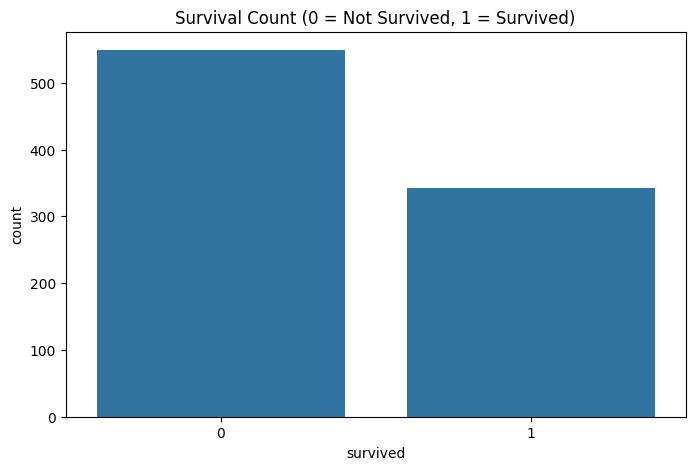

In [ ]:
# 1. 생존 여부 분포
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='survived')
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.show()

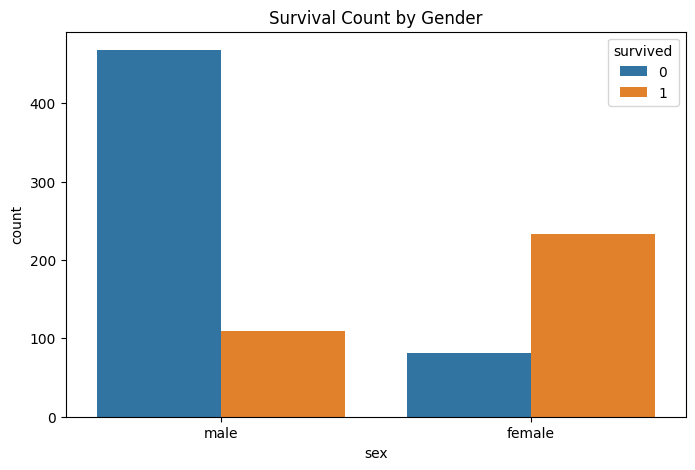

In [ ]:
# 2. 성별에 따른 생존 여부
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title("Survival Count by Gender")
plt.show()

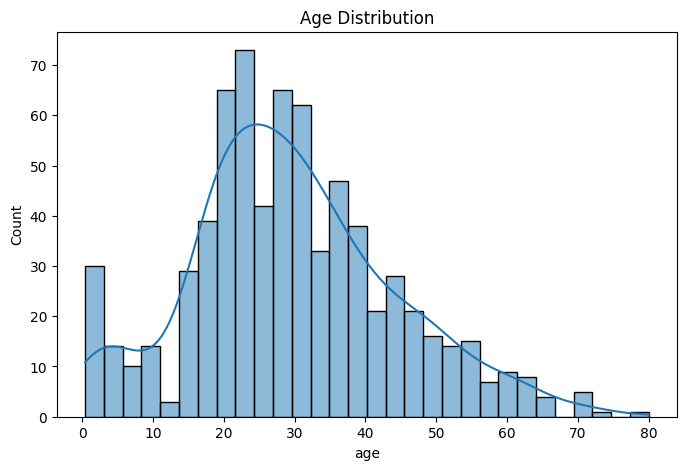

In [ ]:
# 3. 나이 분포
plt.figure(figsize=(8, 5))
# kde : 데이터의 밀도를 추정하는 곡선 추가. bins : 구간을 나눌 개수
sns.histplot(data=titanic, x='age', kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

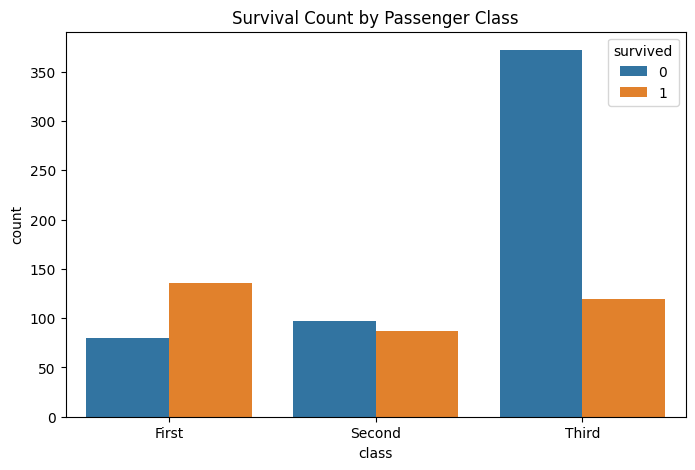

In [ ]:
# 4. 클래스에 따른 생존 여부
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='class', hue='survived')
plt.title("Survival Count by Passenger Class")
plt.show()

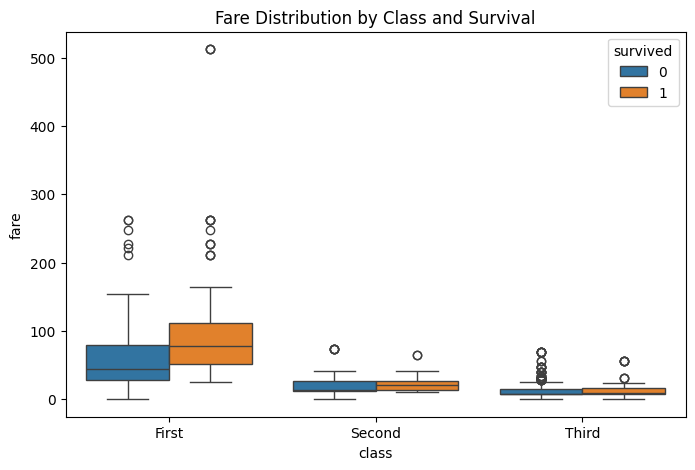

In [ ]:
# 5. 요금 분포
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic, x='class', y='fare', hue='survived')
plt.title("Fare Distribution by Class and Survival")
plt.show()

## 2. 결측치가 모델에 미치는 영향 확인

### 2.1 데이터 내 결측치 확인하기

In [ ]:
print("=== 결측치 개수 확인 ===")
missing_data = titanic.isnull().sum()
print(missing_data[missing_data > 0])

total_missing = titanic.isnull().sum().sum()
print(f"\n전체 데이터셋에서의 결측치 개수: {total_missing}")

missing_per_column = titanic.isnull().sum()
print("\n열별 결측치 개수:")
print(missing_per_column[missing_per_column > 0])

print("\n열별 결측치 비율 (%):")
print((missing_per_column[missing_per_column > 0] / len(titanic) * 100).round(2))

=== 결측치 개수 확인 ===
age            177
embarked         2
deck           688
embark_town      2
dtype: int64

전체 데이터셋에서의 결측치 개수: 869

열별 결측치 개수:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64

열별 결측치 비율 (%):
age            19.87
embarked        0.22
deck           77.22
embark_town     0.22
dtype: float64


<Figure size 1000x600 with 0 Axes>

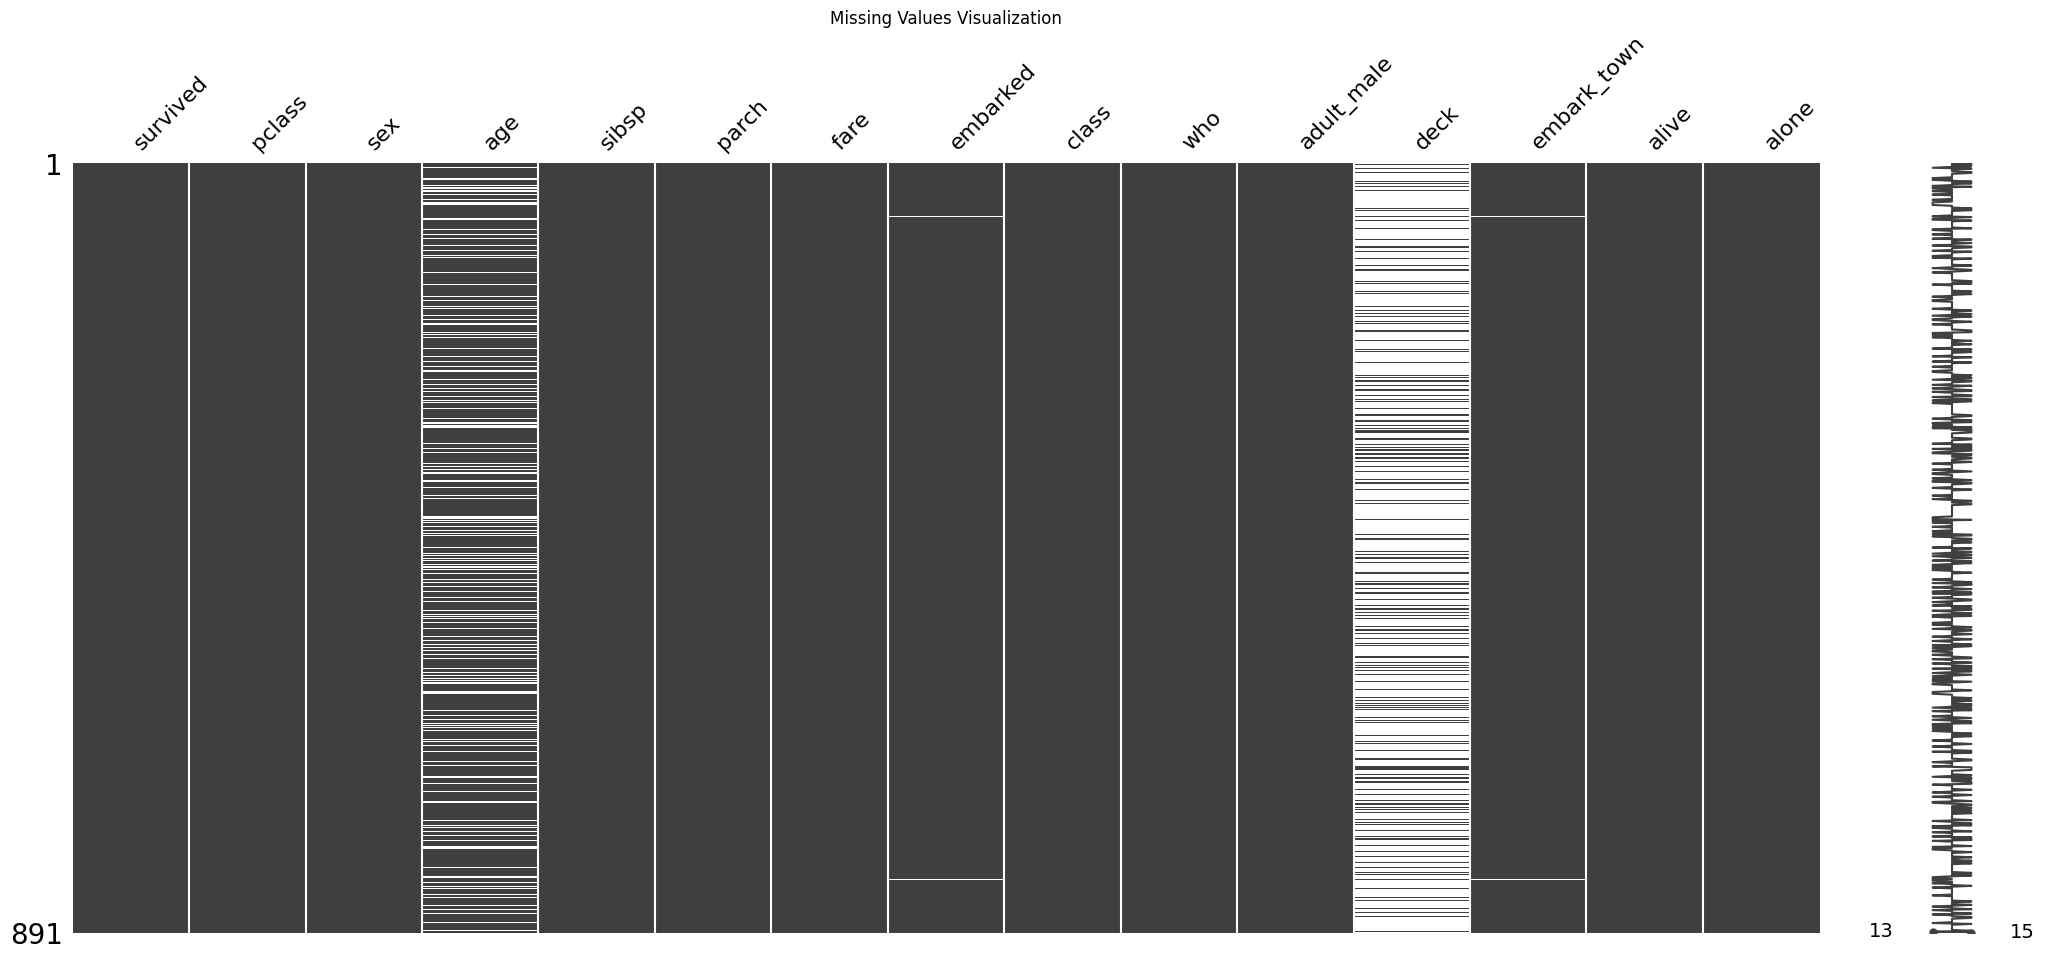

In [ ]:
# 결측치 시각화하기
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
msno.matrix(titanic)
plt.title("Missing Values Visualization")
plt.show()

### 그림에서 흰색 가로 선이 결측치를 의미

### 2.2 결측치 처리 - 제거(drop), 평균값으로 대체(mean)

In [ ]:
# 데이터 전처리
def preprocess_data_missing(data, fill_method=None):
    df = data.copy()

    # 성별, 탑승 항구 등 범주형 변수 인코딩
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # 성별을 0과 1로 변환
    df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # 탑승 항구를 0, 1, 2로 변환
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # 탑승 항구 결측값 대체

    # 결측값 처리 (선택적으로)
    if fill_method == 'drop':
        df = df.dropna()
    elif fill_method == 'mean':
        df['age'] = df['age'].fillna(df['age'].mean())
        df['fare'] = df['fare'].fillna(df['fare'].mean())
    else:
        pass  # 결측값 있는 그대로 유지

    # 필요한 컬럼 선택
    df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
    return df

### 2.3 결측치가 모델에 미치는 영향 - Random Forest
- **Random Forest**는 앙상블(Ensemble) 학습 기법의 하나로, 여러 개의 결정 트리(Decision Tree)를 결합하여 더 나은 예측 성능을 얻는 방법입니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 모델 학습 및 평가
def random_forest_missing(data):
    # 'survived' 열을 타겟 변수(y)로 설정하고, 나머지 열을 특성(X)으로 설정
    X = data.drop(columns='survived')  # 타겟 변수 'survived'를 제외한 특성 데이터
    y = data['survived']  # 타겟 변수 'survived' 선택

    # 데이터를 훈련 세트와 테스트 세트로 분리 (훈련 80%, 테스트 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest 분류기 모델 생성
    model = RandomForestClassifier(random_state=42)  # 무작위성을 제어하기 위해 random_state 설정
    model.fit(X_train, y_train)  # 훈련 데이터를 사용하여 모델 학습

    # 테스트 데이터를 사용하여 예측 수행
    y_pred = model.predict(X_test)  # 모델로 예측

    # 예측 결과와 실제 값(y_test)을 비교하여 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
    return accuracy  # 정확도를 반환


결측치를 그대로 뒀을 때, 제거했을 때, 평균값으로 대체했을 때 성능(정확도) 비교

In [ ]:
# 각 결측치 처리 방법에 따른 성능 비교
methods = ['original', 'drop', 'mean']
results = {}

for method in methods:
    if method == 'original':
        preprocessed_data = preprocess_data_missing(titanic)  # 결측치 처리 없이
    else:
        preprocessed_data = preprocess_data_missing(titanic, fill_method=method)

    # 결측치가 있는 데이터는 제거 후 모델 학습
    if method == 'original':
        preprocessed_data = preprocessed_data.dropna(subset=['age', 'fare'])

    accuracy = random_forest_missing(preprocessed_data)
    results[method] = accuracy


# 결과 출력
print("=== 결측치 처리 방법에 따른 Random Forest 모델 성능 ===")
for method, acc in results.items():
    print(f"{method.capitalize()} 처리: Accuracy = {acc:.4f}")

=== 결측치 처리 방법에 따른 Random Forest 모델 성능 ===
Original 처리: Accuracy = 0.7762
Drop 처리: Accuracy = 0.6757
Mean 처리: Accuracy = 0.8101


- 결측치를 제거하는 것보다 평균값으로 대체할 때 예측 성능이 향상됨

### 2.4 결측치가 모델에 미치는 영향 - Logistic Regression
- Logistic Regression은 데이터가 어떤 범주에 속할 확률을 정하고 가능성이 더 높은 범주에 속하는 것으로 분류하는 알고리즘입니다.

In [ ]:
from sklearn.linear_model import LogisticRegression

titanic = sns.load_dataset('titanic')

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 1분위수
    Q3 = df[column].quantile(0.75)  # 3분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 하한
    upper_bound = Q3 + 1.5 * IQR  # 상한
    return (df[column] < lower_bound) | (df[column] > upper_bound)


def logistic_regression_missing(data):
    # 'survived' 열을 타겟 변수(y)로 설정하고, 나머지 열을 특성(X)으로 설정
    X = data.drop(columns='survived')  # 타겟 변수 'survived'를 제외한 특성 데이터
    y = data['survived']  # 타겟 변수 'survived' 선택

    # 데이터를 훈련 세트와 테스트 세트로 분리 (훈련 80%, 테스트 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression 모델 생성 (최대 반복 횟수를 1000으로 설정하여 수렴을 보장)
    model = LogisticRegression(max_iter=1000, random_state=42)  # 무작위성을 제어하기 위해 random_state 설정
    model.fit(X_train, y_train)  # 훈련 데이터를 사용하여 모델 학습

    # 테스트 데이터를 사용하여 예측 수행
    y_pred = model.predict(X_test)  # 모델로 예측

    # 예측 결과와 실제 값(y_test)을 비교하여 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
    return accuracy  # 정확도를 반환


# 각 결측값 처리 방법에 따른 성능 비교
methods = ['original', 'drop', 'mean']
results = {}


for method in methods:
    if method == 'original':
        preprocessed_data = preprocess_data_missing(titanic)  # 결측값 처리 없이
    else:
        preprocessed_data = preprocess_data_missing(titanic, fill_method=method)

    # 결측값이 있는 데이터는 제거 후 모델 학습
    if method == 'original':
        preprocessed_data = preprocessed_data.dropna(subset=['age', 'fare'])

    accuracy = logistic_regression_missing(preprocessed_data)
    results[method] = accuracy

# 결과 출력
print("=== 결측값 처리 방법에 따른 Logistic Regression 모델 성능 ===")
for method, acc in results.items():
    print(f"{method.capitalize()} 처리: Accuracy = {acc:.4f}")

=== 결측값 처리 방법에 따른 Logistic Regression 모델 성능 ===
Original 처리: Accuracy = 0.7413
Drop 처리: Accuracy = 0.6486
Mean 처리: Accuracy = 0.8101


- 결측치를 제거하는 것보다 평균값으로 대체할 때 예측 성능이 향상됨

## 3. 이상치가 모델에 미치는 영향 확인

### 3.1 이상치 확인

**이상치(Outlier)**
데이터의 1분위수를 Q1, 3분위수를 Q3라 하고 Q3-Q1을 IQR이라 합니다.

이 때 Q1 - 1.5 * IQR보다 낮은 값과 Q3 + 1.5 * IQR 보다 큰 값들을 이상치라 합니다.

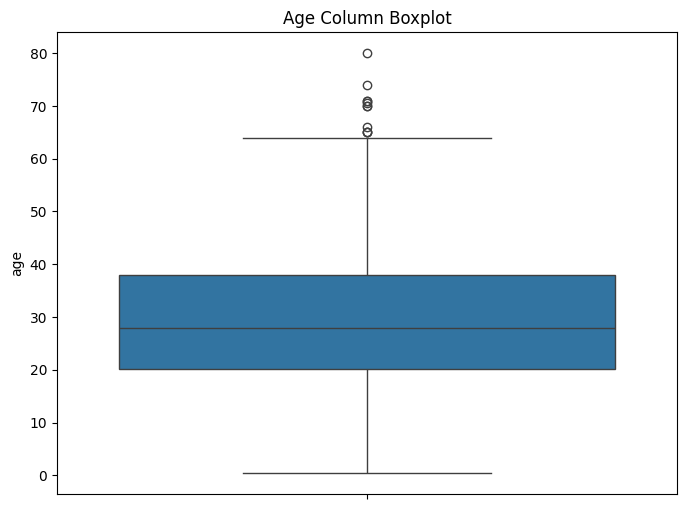


age 컬럼에서 발견된 이상치 개수: 11


In [ ]:
# age 컬럼의 이상치 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=titanic)
plt.title('Age Column Boxplot')
plt.show()

# IQR을 이용한 이상치 탐지
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = titanic[(titanic['age'] < Q1 - 1.5 * IQR) | (titanic['age'] > Q3 + 1.5 * IQR)]
print(f"\nage 컬럼에서 발견된 이상치 개수: {outliers.shape[0]}")

### 3.2 이상치 처리

In [ ]:
def handle_outliers(df, method):
    # 'age'와 'fare' 컬럼에서 이상치를 처리
    for column in ['age', 'fare']:  # 수치형 변수인 'age'와 'fare'만 처리
        outliers = detect_outliers(df, column)  # 'detect_outliers' 함수를 사용하여 이상치 인덱스 탐지
        if method == 'remove':  # 이상치를 제거하는 방법
            df = df[~outliers]  # 이상치가 포함된 행을 제거
        elif method == 'mean':  # 이상치를 평균값으로 대체하는 방법
            df.loc[outliers, column] = df[column].mean()  # 이상치 값을 해당 컬럼의 평균으로 대체
    return df  # 이상치 처리가 완료된 데이터프레임 반환

def preprocess_data_outlier(data, outlier_method=None):
    # 데이터프레임을 복사하여 원본 데이터를 수정하지 않도록 함
    df = data.copy()

    # 범주형 변수 인코딩
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # 'male'을 0, 'female'을 1로 매핑
    df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # 'C', 'Q', 'S'를 각각 0, 1, 2로 매핑
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # 'embarked' 컬럼의 결측치를 최빈값으로 채움
    df['age'] = df['age'].fillna(df['age'].mean())  # 'age' 컬럼의 결측치를 평균값으로 채움
    df['fare'] = df['fare'].fillna(df['fare'].mean())  # 'fare' 컬럼의 결측치를 평균값으로 채움

    # 이상치 처리 (선택적으로 처리)
    if outlier_method:
        df = handle_outliers(df, method=outlier_method)  # outlier_method가 주어지면 이상치 처리 함수 호출

    # 분석에 사용할 변수 선택
    df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]  # 필요한 컬럼만 선택
    return df  # 전처리된 데이터프레임 반환


### 3.3 이상치가 모델에 미치는 영향 - Random Forest

In [ ]:
# 모델 학습 및 평가
titanic = sns.load_dataset('titanic')

def random_forest_outlier(data):
    X = data.drop(columns='survived')
    y = data['survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# 이상치 처리 방법에 따른 성능 비교
methods = ['original', 'remove', 'mean']
results = {}

for method in methods:
    if method == 'original':
        preprocessed_data = preprocess_data_outlier(titanic)  # 이상치 처리 없이
    else:
        preprocessed_data = preprocess_data_outlier(titanic, outlier_method=method)

    accuracy = random_forest_outlier(preprocessed_data)
    results[method] = accuracy

# 결과 출력
print("=== 이상치 처리 방법에 따른 Random Forest 모델 성능 ===")
for method, acc in results.items():
    print(f"{method.capitalize()} 처리: Accuracy = {acc:.4f}")

=== 이상치 처리 방법에 따른 Random Forest 모델 성능 ===
Original 처리: Accuracy = 0.8101
Remove 처리: Accuracy = 0.7847
Mean 처리: Accuracy = 0.8380


### 3.4 이상치가 모델에 미치는 영향 - Logistic Regression

In [ ]:
# 모델 학습 및 평가
titanic = sns.load_dataset('titanic')

def logistic_regression_outlier(data):
    X = data.drop(columns='survived')  # 독립 변수
    y = data['survived']  # 종속 변수
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression 모델
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# 이상치 처리 방법에 따른 성능 비교
methods = ['original', 'remove', 'mean']
results = {}

for method in methods:
    if method == 'original':
        preprocessed_data = preprocess_data_outlier(titanic)  # 이상치 처리 없이
    else:
        preprocessed_data = preprocess_data_outlier(titanic, outlier_method=method)

    accuracy = logistic_regression_outlier(preprocessed_data)
    results[method] = accuracy

# 결과 출력
print("=== 이상치 처리 방법에 따른 Logistic Regression 모델 성능 ===")
for method, acc in results.items():
    print(f"{method.capitalize()} 처리: Accuracy = {acc:.4f}")

=== 이상치 처리 방법에 따른 Logistic Regression 모델 성능 ===
Original 처리: Accuracy = 0.8101
Remove 처리: Accuracy = 0.7708
Mean 처리: Accuracy = 0.7709
